In [1]:
from simtk.openmm import app
import simtk.openmm as mm
from simtk import unit
import mdtraj as md
import nglview as ngl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pdb = app.PDBFile('/Users/kaushikborthakur1211/Desktop/CHEM101.6/data/butane.pdb')
forcefield = app.ForceField('/Users/kaushikborthakur1211/Desktop/butane.new.gaff2.xml')

In [3]:
system = forcefield.createSystem(pdb.topology, nonbondedMethod=app.NoCutoff, constraints=app.HBonds)
integrator = mm.LangevinIntegrator(298.15*unit.kelvin, 5.0/unit.picoseconds, 2.0*unit.femtoseconds)
integrator.setConstraintTolerance(1e-5)
platform = mm.Platform.getPlatformByName('Reference')
simulation = app.Simulation(pdb.topology, system, integrator, platform)
simulation.context.setPositions(pdb.positions)

In [4]:
print('Minimizing...')

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy before minimization is {st.getPotentialEnergy()}")

simulation.minimizeEnergy(maxIterations=100)

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy after minimization is {st.getPotentialEnergy()}")

Minimizing...
Potential energy before minimization is 5.7975286921530005 kJ/mol
Potential energy after minimization is 5.29578450111398 kJ/mol


In [5]:
from sys import stdout

print('Equilibrating...')

simulation.reporters.append(app.StateDataReporter(stdout, 100, step=True, 
    potentialEnergy=True, temperature=True, separator=','))
simulation.context.setVelocitiesToTemperature(150.0*unit.kelvin)
simulation.step(2500)

Equilibrating...
#"Step","Potential Energy (kJ/mole)","Temperature (K)"
100,38.14028030924624,172.91362726946153
200,37.37941548304133,282.72448981867046
300,42.49842356022182,302.9167228023745
400,33.951623472696234,320.0135770509787
500,41.0010441131726,253.92740308297613
600,31.937995430182397,283.53994335771824
700,43.004950986646705,257.3697546460428
800,47.76376700847399,264.97256167605724
900,40.5574588999022,243.06393581913662
1000,64.47397031169035,506.7158885326317
1100,37.47956823471355,420.4982638284877
1200,36.06507331647103,283.8444832231723
1300,33.32074884380134,268.0154475662931
1400,40.707218995857865,311.3543704908876
1500,35.67574943250926,344.87481839174967
1600,43.550503291074826,342.9126152828768
1700,43.01175652492823,218.78947459519074
1800,30.71994806907461,448.1119730618986
1900,30.632274126193032,408.5361844925445
2000,39.01114424366219,196.49446971382778
2100,41.956300079712456,340.7040671216519
2200,38.288207627070626,298.80302695920767
2300,30.75073662925

In [6]:
import time as time

print('Running Production...')

# Begin timer
tinit=time.time()

# Clear simulation reporters
simulation.reporters.clear()

# Reinitialize simulation reporters. We do this because we want different information printed from the production run than the equilibration run.
# output basic simulation information below every 250000 steps - (which is equal to 2 fs(250,000) = 500,000 fs = 500 ps)
simulation.reporters.append(app.StateDataReporter(stdout, 250000, 
    step=True, time=True, potentialEnergy=True, temperature=True, 
    speed=True, separator=','))

# write out a trajectory (i.e., coordinates vs. time) to a DCD
# file every 100 steps - 0.2 ps
simulation.reporters.append(app.DCDReporter('/Users/kaushikborthakur1211/Desktop/CHEM101.6/data/butane_new_sim.dcd', 100))

# run the simulation for 1.0x10^7 steps - 20 ns
simulation.step(10000000)

# End timer
tfinal=time.time()
print('Done!')
print('Time required for simulation:', tfinal-tinit, 'seconds')

Running Production...
#"Step","Time (ps)","Potential Energy (kJ/mole)","Temperature (K)","Speed (ns/day)"
250000,500.0000000016593,35.728921369855,334.31100488205175,0
500000,999.9999999901769,25.65762483161236,278.24842374422633,1.88e+04
750000,1499.9999999783536,60.98250229291947,259.08715441235097,1.89e+04
1000000,1999.9999999665301,37.71046553230755,327.18940397286497,1.89e+04
1250000,2499.9999999547067,34.91069074090907,447.63147012228825,1.89e+04
1500000,2999.9999999428833,56.96688695249097,313.6250173330184,1.89e+04
1750000,3499.99999993106,32.49931436672596,395.7359151166138,1.89e+04
2000000,3999.9999999192364,22.284376152445283,270.5862815270997,1.89e+04
2250000,4499.9999999992715,39.1339283141868,358.6647869216908,1.9e+04
2500000,5000.000000101135,49.36612171200035,381.32332509771277,1.89e+04
2750000,5500.000000202998,23.18192108392664,274.8456210459681,1.9e+04
3000000,6000.000000304862,73.71916659311113,336.78458345654303,1.9e+04
3250000,6500.000000406725,39.112380642754566,

In [7]:
traj = md.load('/Users/kaushikborthakur1211/Desktop/CHEM101.6/data/butane_sim.dcd', top='/Users/kaushikborthakur1211/Desktop/CHEM101.6/data/butane.pdb')

In [9]:
atoms, bonds = traj.topology.to_dataframe()
atoms

,serial,name,element,resSeq,resName,chainID,segmentID
0,1,C1,C,1,NBU,0,
1,2,H11,H,1,NBU,0,
2,3,H12,H,1,NBU,0,
3,4,H13,H,1,NBU,0,
4,5,C2,C,1,NBU,0,
5,6,H21,H,1,NBU,0,
6,7,H22,H,1,NBU,0,
7,8,C3,C,1,NBU,0,
8,9,H31,H,1,NBU,0,
9,10,H32,H,1,NBU,0,


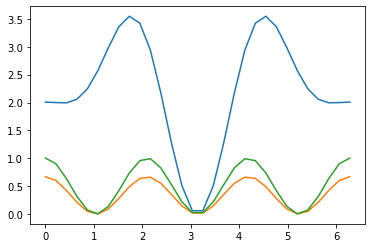

In [10]:
import math
#First Lets make a linespace from -pi to pi
rad_ang=np.linspace(0,2*math.pi,30)

##Lets right a function that takes paramters from the xml and writes the force field term

def calc_torsion_energy(angle,k1,period,phase):
     e=k1*(1+np.cos(period*angle-phase))
     return e

def CCCC_torsionE(angle):
 e1=calc_torsion_energy(angle,0.4602,1,0)
 e2=calc_torsion_energy(angle,1.2134,2,3.1416)
 e3=calc_torsion_energy(angle,0.5439,3,0)
 return e1+e2+e3

def CCCH_torsionE(angle):
 e1=calc_torsion_energy(angle,0.3347,3,0)
 return e1

def HCCH_torsionE(angle):
 e1=calc_torsion_energy(angle,0.50208,3,0)
 return e1

CCCC_e=CCCC_torsionE(rad_ang)
CCCH_e=CCCH_torsionE(rad_ang)
HCCH_e=HCCH_torsionE(rad_ang)


plt.plot(rad_ang,CCCC_e)
plt.plot(rad_ang,CCCH_e)
plt.plot(rad_ang,HCCH_e)

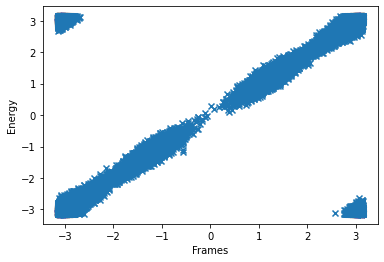

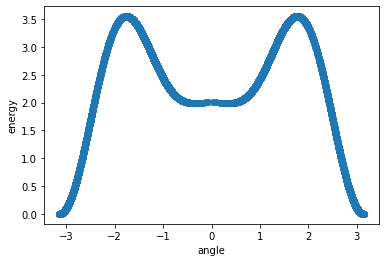

In [15]:
CCCC_dih = md.compute_dihedrals(traj, [[0,4,7,10]])
C2H_C3H_dih = md.compute_dihedrals(traj,[[8,7,4,5]])
plt.scatter(CCCC_dih, C2H_C3H_dih, marker ='x')
plt.xlabel("Frames")
plt.ylabel("Energy")
plt.show()
plt.clf()

CCCC_en = []
for x in CCCC_dih:
    CCCC_en.append(CCCC_torsionE(x))

plt.scatter(CCCC_dih, CCCC_en)
plt.xlabel("angle")
plt.ylabel("energy")
plt.show()

 <NonbondedForce coulomb14scale="0.833333" lj14scale="0.5">
  <Atom type="0" charge="-0.0932" sigma="0.3397710" epsilon="0.4510352"/>
  <Atom type="1" charge="-0.0814" sigma="0.3397710" epsilon="0.4510352"/>
  <Atom type="2" charge="0.0324" sigma="0.2600177" epsilon="0.0870272"/>
  <Atom type="3" charge="0.0387" sigma="0.2600177" epsilon="0.0870272"/>
 </NonbondedForce>
 
 <Residue name="NBU">
   <Atom name="C1" type="0"/>
   <Atom name="H11" type="2"/>
   <Atom name="H12" type="2"/>
   <Atom name="H13" type="2"/>
   <Atom name="C2" type="1"/>
   <Atom name="H21" type="3"/>
   <Atom name="H22" type="3"/>
   <Atom name="C3" type="1"/>
   <Atom name="H31" type="3"/>
   <Atom name="H32" type="3"/>
   <Atom name="C4" type="0"/>
   <Atom name="H41" type="2"/>
   <Atom name="H42" type="2"/>
   <Atom name="H43" type="2"/>

In [20]:
sigma1 = 0.3397710
eps1 = 0.4510352
sigma2 = 0.2600177
eps2 = 0.0870272
q1 = -0.0932
q2 = -0.0814
q3 = 0.0324
q4 = 0.0387

/Users/kaushikborthakur1211/opt/anaconda3/envs/New_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/Users/kaushikborthakur1211/opt/anaconda3/envs/New_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in subtract
  """


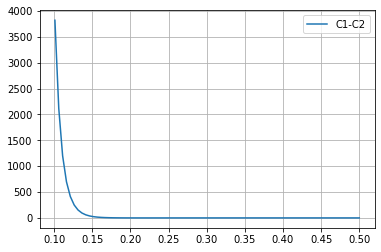

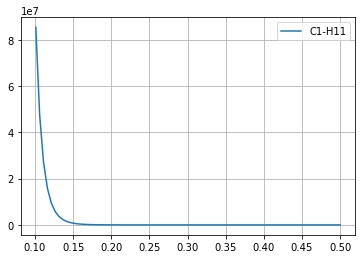

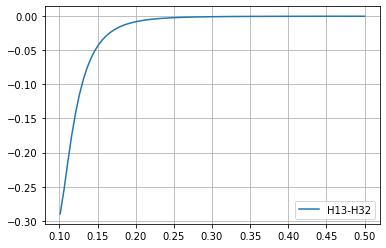

<Figure size 432x288 with 0 Axes>

In [33]:
r = np.linspace(0.,0.5,100)
def LJ(sigma,eps,r):
    A = 4*sigma*(eps**12)
    B = 4*sigma*(eps**6)
    return A/(r**12)-B/(r**6)

#type:0-1
C1C2_LJ = LJ(0.5*(sigma1+sigma1),(eps1*eps1)**0.5,r)
#type:0-2
C1H11_LJ = LJ(0.5*(sigma1+sigma2),(eps1*eps2)**0.5,r)
#type:2-3
H13_H32_LJ = LJ(0.5*(sigma2+sigma2),(eps2*eps2)**0.5,r)

plt.plot(r[20:],C1H21_LJ[20:], label = 'C1-C2')
plt.legend()
plt.grid()
plt.show()
plt.clf()
plt.plot(r[20:],C1C2_LJ[20:], label = 'C1-H11')
plt.legend()
plt.grid()
plt.show()
plt.clf()
plt.plot(r[20:],H11H32_LJ[20:], label = 'H13-H32')
plt.legend()
plt.grid()
plt.show()
plt.clf()

In [37]:
from math import pi
eps0 = 8.854*(10**-12)
factor = 1/((4*pi)*eps0)
def colomb_pot(x,y,r):
    return (factor*((x*y)/r))

/Users/kaushikborthakur1211/opt/anaconda3/envs/New_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


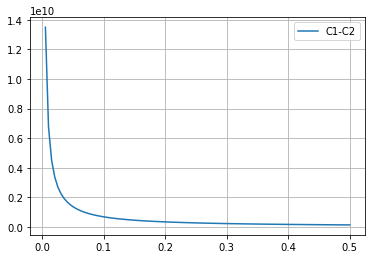

/Users/kaushikborthakur1211/opt/anaconda3/envs/New_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


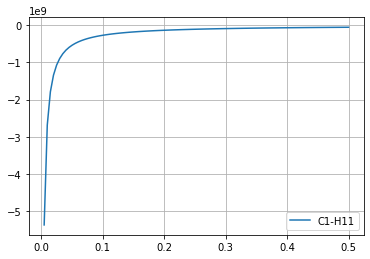

/Users/kaushikborthakur1211/opt/anaconda3/envs/New_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


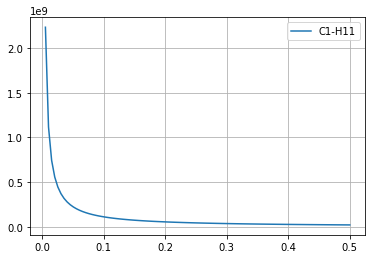

<Figure size 432x288 with 0 Axes>

In [43]:
C1C2_col = colomb_pot(q1,q2,r)
plt.plot(r,C1C2_col, label = 'C1-C2')
plt.legend()
plt.grid()
plt.show()
plt.clf()

C1H11_col = colomb_pot(q1,q3,r)
plt.plot(r,C1H11_col, label = 'C1-H11')
plt.legend()
plt.grid()
plt.show()
plt.clf()


H13_H32_col = colomb_pot(q3,q4,r)
plt.plot(r,H13_H32_col, label = 'C1-H11')
plt.legend()
plt.grid()
plt.show()
plt.clf()